**Loading** CMU-MOSI **dataset**

In [ ]:
!git clone https://github.com/pliang279/MultiBench.git

Cloning into 'MultiBench'...
remote: Enumerating objects: 6943, done.
remote: Counting objects: 100% (154/154), done.
remote: Compressing objects: 100% (94/94), done.
remote: Total 6943 (delta 72), reused 121 (delta 60), pack-reused 6789
Receiving objects: 100% (6943/6943), 51.07 MiB | 18.70 MiB/s, done.
Resolving deltas: 100% (4258/4258), done.


In [ ]:
%cd MultiBench

/content/MultiBench


In [ ]:
!mkdir data
!pip install gdown && gdown https://drive.google.com/u/0/uc?id=1szKIqO0t3Be_W91xvf6aYmsVVUa7wDHU

mkdir: cannot create directory ‘data’: File exists


In [ ]:
import torch
import sys
import os

In [ ]:
# Import the associated dataloader for affect datasets, which MOSI is a part of.
from datasets.affect.get_data import get_dataloader

# Create the training, validation, and test-set dataloaders.
traindata, validdata, testdata = get_dataloader(
    '/content/MultiBench/mosi_raw.pkl', robust_test=False, max_pad=True, data_type='mosi', max_seq_len=50)

## **splitting dataset to remove bias**

In [ ]:
from torch.utils.data import TensorDataset,DataLoader,ConcatDataset
import numpy as np

In [ ]:
labels_mapping = {
        -2: 0,
        -1: 1,
        0: 2,
        1: 3,
        2: 4
    }

In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

for batch in traindata:
  video,audio,text,labels=batch
  labels = torch.clamp(labels, min=-2, max=2)
  # labels = torch.round(labels)
  for i in range(labels.size(0)):
        if labels[i] < -1:
            labels[i] = -2
        elif -1 <= labels[i] < 0:
            labels[i] = -1
        elif labels[i] == 0:
            labels[i] = 0
        elif 0 < labels[i] <= 1:
            labels[i] = 1
        elif 1 < labels[i] >1:
            labels[i] = 2

  labels_mapped = torch.empty_like(labels)

  for i in range(labels.size(0)):
      labels_mapped[i] = labels_mapping[labels[i].item()]


  all_labels.extend(labels_mapped)
  all_text.extend(text)
  all_video.extend(video)
  all_audio.extend(audio)


print("counts:")
print("-2",all_labels.count(torch.tensor(0)))
print("-1",all_labels.count(torch.tensor(1)))
print("0",all_labels.count(torch.tensor(2)))
print("1",all_labels.count(torch.tensor(3)))
print("2",all_labels.count(torch.tensor(4)))

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print("\n")
print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
train_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)


counts:
-2 303
-1 249
0 53
1 213
2 465


torch.Size([1283, 50, 74])
torch.Size([1283, 50, 35])
torch.Size([1283, 50, 300])
torch.Size([1283, 1])


In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

for batch in validdata:
  video,audio,text,labels=batch
  labels = torch.clamp(labels, min=-2, max=2)
  # labels = torch.round(labels)
  for i in range(labels.size(0)):
        if labels[i] < -1:
            labels[i] = -2
        elif -1 <= labels[i] < 0:
            labels[i] = -1
        elif labels[i] == 0:
            labels[i] = 0
        elif 0 < labels[i] <= 1:
            labels[i] = 1
        elif 1 < labels[i] >1:
            labels[i] = 2

  labels_mapped = torch.empty_like(labels)

  for i in range(labels.size(0)):
      labels_mapped[i] = labels_mapping[labels[i].item()]

  all_labels.extend(labels_mapped)
  all_text.extend(text)
  all_video.extend(video)
  all_audio.extend(audio)

print("counts:")
print("-2",all_labels.count(torch.tensor(0)))
print("-1",all_labels.count(torch.tensor(1)))
print("0",all_labels.count(torch.tensor(2)))
print("1",all_labels.count(torch.tensor(3)))
print("2",all_labels.count(torch.tensor(4)))

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print("\n")
print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
val_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)


counts:
-2 47
-1 31
0 13
1 38
2 85


torch.Size([214, 50, 74])
torch.Size([214, 50, 35])
torch.Size([214, 50, 300])
torch.Size([214, 1])


In [ ]:
all_audio=[]
all_video=[]
all_text = []
all_labels = []

for batch in testdata:
  video,audio,text,labels=batch
  labels = torch.clamp(labels, min=-2, max=2)
  # labels = torch.round(labels)
  for i in range(labels.size(0)):
        if labels[i] < -1:
            labels[i] = -2
        elif -1 <= labels[i] < 0:
            labels[i] = -1
        elif labels[i] == 0:
            labels[i] = 0
        elif 0 < labels[i] <= 1:
            labels[i] = 1
        elif 1 < labels[i] >1:
            labels[i] = 2

  labels_mapped = torch.empty_like(labels)

  for i in range(labels.size(0)):
      labels_mapped[i] = labels_mapping[labels[i].item()]

  all_labels.extend(labels_mapped)
  all_text.extend(text)
  all_video.extend(video)
  all_audio.extend(audio)

print("counts:")
print("-2",all_labels.count(torch.tensor(0)))
print("-1",all_labels.count(torch.tensor(1)))
print("0",all_labels.count(torch.tensor(2)))
print("1",all_labels.count(torch.tensor(3)))
print("2",all_labels.count(torch.tensor(4)))

all_audio=torch.stack(all_audio)
all_video=torch.stack(all_video)
all_text=torch.stack(all_text)
all_labels=torch.stack(all_labels)

print("\n")

print(all_audio.shape)
print(all_video.shape)
print(all_text.shape)
print(all_labels.shape)

new_dataset = TensorDataset(all_audio,all_video,all_text, all_labels)
test_dataloader = DataLoader(new_dataset, batch_size=16,shuffle=True)


counts:
-2 263
-1 116
0 30
1 109
2 168


torch.Size([686, 50, 74])
torch.Size([686, 50, 35])
torch.Size([686, 50, 300])
torch.Size([686, 1])


--------------------------------------------------------------------------------------------------------------------------------------

In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
import torch.nn.functional as F

class SubnetModel(nn.Module):
    def __init__(self,input_size,num_utterances,fc1_size, fc2_size,fc3_size):
        super(SubnetModel, self).__init__()

        self.drop = nn.Dropout(p=0.15)

        # Fully connected layers

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(input_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)
        self.fc3 = nn.Linear(fc2_size, fc3_size)

        # Activation functions
        self.relu = nn.ReLU()

        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True


    def forward(self, x):

        x = torch.mean(x, dim=1)

        fc1_out = self.relu(self.fc1(x))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)

        fc3_out=self.relu(self.fc3(fc2_out))
        # drop3=self.drop(fc3_out)

        return fc3_out



In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter

class TextModel(nn.Module):
    def __init__(self,input_size, hidden_size, num_layers,fc1_size, fc2_size):
        super(TextModel, self).__init__()

        # LSTM layer
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers,batch_first=True)

        # Fully connected layers
        self.drop = nn.Dropout(p=0.15)

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(hidden_size, fc1_size)
        self.fc2 = nn.Linear(fc1_size, fc2_size)

        # Activation functions
        self.relu = nn.ReLU()
        # self.sigmoid=nn.Sigmoid()

        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True

    def forward(self, x):

        # LSTM layer

        lstm_out, (hidden_states, cell_states) = self.lstm(x)

        fc1_out = self.relu(self.fc1(hidden_states.squeeze()))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)


        return fc2_out



In [ ]:
import torch
import torch.nn as nn
from torch.nn.parameter import Parameter
from torch.autograd import Variable

class TFN(nn.Module):
    def __init__(self,audio_params,video_params,text_params,SIN_params):
        super(TFN, self).__init__()

        self.audio_params=audio_params
        self.video_params=video_params
        self.text_params=text_params

        #unimodels
        self.audio_subnet=SubnetModel(audio_params[0],audio_params[1],audio_params[2],audio_params[3],audio_params[4])
        self.video_subnet=SubnetModel(video_params[0],video_params[1],video_params[2],video_params[3],video_params[4])
        self.text_subnet=TextModel(text_params[0],text_params[1],text_params[2],text_params[3],text_params[4])

        # Fully connected layers

        self.drop = nn.Dropout(p=0.15)

        #fc1 gets hidden_size dimension values as input
        self.fc1 = nn.Linear(((audio_params[2]+1)*(video_params[2]+1)*(text_params[3]+1)), SIN_params[0])
        self.fc2 = nn.Linear(SIN_params[0], SIN_params[1])

        # Output layer
        self.output_layer = nn.Linear(SIN_params[1], 5)

        # Activation functions
        self.relu = nn.ReLU()
        self.softmax=nn.Softmax(dim=1)

        # Set requires_grad=True for the weights of the layers
        for param in self.parameters():
            param.requires_grad = True

    def forward(self,x):

        DTYPE = torch.FloatTensor

        batch_size=x[0].shape[0]

        # unimodal outputs

        audio_out=self.audio_subnet(x[0])
        video_out=self.video_subnet(x[1])
        text_out=self.text_subnet(x[2])

        # adding 1 to increase the dimension value

        audio_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), audio_out), dim=1)
        # print("audio_out")
        # print(audio_out.shape)
        video_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), video_out), dim=1)
        # print("video_out")
        # print(video_out.shape)
        text_out = torch.cat((Variable(torch.ones(batch_size, 1).type(DTYPE), requires_grad=False), text_out), dim=1)
        # print("text_out")
        # print(text_out.shape)


        # tensorfusion operation

        fusion_tensor = torch.bmm(audio_out.unsqueeze(2), video_out.unsqueeze(1))
        # print("fusion tensor 1")
        # print(fusion_tensor.shape)
        fusion_tensor = fusion_tensor.view(-1, (self.audio_params[2] + 1) * (self.video_params[2] + 1), 1)
        # print("fusion tensor 2")
        # print(fusion_tensor.shape)
        fusion_tensor = torch.bmm(fusion_tensor, text_out.unsqueeze(1)).view(batch_size, -1)
        # print("fusion tensor 3")
        # print(fusion_tensor.shape)

        # sentiment inference network (SIN)

        fc1_out = self.relu(self.fc1(fusion_tensor))
        # drop1=self.drop(fc1_out)

        fc2_out = self.relu(self.fc2(fc1_out))
        # drop2=self.drop(fc2_out)

        output = self.output_layer(fc2_out)

        return output

**-------------------------------------------------------------------------------------------------------------------------------------**

In [ ]:
max_seq_len=50

audio_params=(74,max_seq_len,32,32,32) # (feature_length,max_seq_len,fc1_size,fc2_size,fc3_size)
video_params=(35,max_seq_len,32,32,32) # (feature_length,max_seq_len,fc1_size,fc2_size,fc3_size)
text_params=(300,128,1,128,128) # (feature_length,LSTM_hidden_size,num_LSTM_layers,fc1_size,fc2_size)

SIN_params=(128,128)

final_model=TFN(audio_params,video_params,text_params,SIN_params)


loading weights of saved model

In [ ]:
final_model.load_state_dict(torch.load('/content/drive/MyDrive/multi_model_SA/final_model_files/TFN_5class.pth'))

<All keys matched successfully>

In [ ]:
optimizer = torch.optim.Adam(final_model.parameters(),lr=5e-5)
num_epochs = 20

In [ ]:
import numpy as np
from sklearn.metrics import accuracy_score ,f1_score
import torch.nn.functional as F

In [ ]:
for epoch in range(num_epochs):

    print("EPOCH : ",epoch+1)
    # Training
    total_train_loss=0.0
    num_sequences=0
    correct=0
    all_predictions = []
    all_targets = []
    final_model.train()  # Set the model to training mode
    for batch in train_dataloader:
        # targets=targets.unsqueeze(1).repeat(1, 50, 1)
        optimizer.zero_grad()  # Zero the gradients
        outputs = final_model(batch[:-1])

        labels=batch[-1]
        labels=labels.squeeze().long()

        loss=F.cross_entropy(outputs, labels)

        # loss = Loss(outputs, labels) # calculate loss based on probability values
        total_train_loss+=loss
        loss.backward()  # Backpropagation
        optimizer.step()  # Update weights

        probabilities = torch.softmax(outputs, dim=1)
        max_index = torch.argmax(probabilities, dim=1)

        all_predictions.extend(max_index)
        all_targets.extend(labels)

        num_sequences+=1


    average_train_loss = total_train_loss / num_sequences
    all_predictions = np.array([prediction.detach().numpy() for prediction in all_predictions])
    all_targets = np.array([target.detach().numpy() for target in all_targets])

    train_acc= accuracy_score(all_targets, all_predictions)
    print("-------------Training----------------")
    print(f'Epoch [{epoch + 1}/{num_epochs}],accuracy:{train_acc:.4f}')


    # Validation
    final_model.eval()  # Set the model to evaluation mode
    total_val_loss = 0.0
    num_sequences=0
    val_all_predictions = []
    val_all_targets = []
    with torch.no_grad():

        for batch in test_dataloader:
            val_targets=batch[-1]
            val_outputs = final_model(batch[:-1])
            val_targets=val_targets.squeeze().long()

            val_loss=F.cross_entropy(val_outputs, val_targets)
            total_val_loss += val_loss.item()

            val_probabilities = torch.softmax(val_outputs, dim=1)
            val_max_index = torch.argmax(val_probabilities, dim=1)


            val_all_predictions.extend(val_max_index)
            val_all_targets.extend(val_targets)
            num_sequences+=1

    average_val_loss = total_val_loss / num_sequences
    val_all_predictions = np.array([prediction.detach().numpy() for prediction in val_all_predictions])
    val_all_targets = np.array([target.detach().numpy() for target in val_all_targets])
    acc = accuracy_score(val_all_targets, val_all_predictions)



    print("--------------Validation----------")
    print(f'Epoch [{epoch + 1}/{num_epochs}],accuracy: {acc:.4f}')

    print("\n \n")


---------------------------------------------------------------------------------------------

Test accuracy: 0.3192


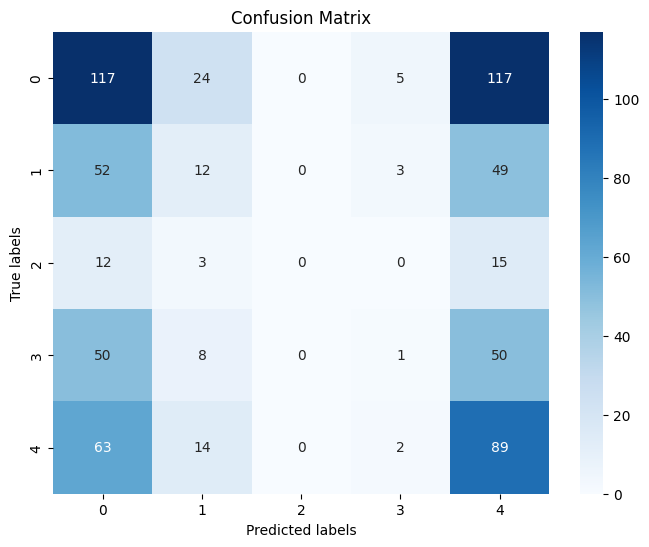

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

final_model.eval()

with torch.no_grad():
    test_all_predictions = []
    test_all_targets = []

    for batch in test_dataloader:
        test_targets=batch[-1]
        test_outputs = final_model(batch[:-1])
        test_targets=test_targets.squeeze().long()

        test_probabilities = torch.softmax(test_outputs, dim=1)
        test_max_index = torch.argmax(test_probabilities, dim=1)

        test_all_predictions.extend(test_max_index)
        test_all_targets.extend(test_targets)


    test_all_predictions = np.array([prediction.detach().numpy() for prediction in test_all_predictions])
    test_all_targets = np.array([target.detach().numpy() for target in test_all_targets])
    acc = accuracy_score(test_all_targets, test_all_predictions)

    print(f'Test accuracy: {acc:.4f}')

    # Compute confusion matrix
    conf_matrix = confusion_matrix(test_all_targets, test_all_predictions)

    # Plot confusion matrix
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues",
                  xticklabels=np.unique(test_all_targets), yticklabels=np.unique(test_all_targets))
    plt.xlabel('Predicted labels')
    plt.ylabel('True labels')
    plt.title('Confusion Matrix')
    plt.show()


----------------------------------------------------------------------------------------------------------------------------------

on test_dataloader:

Test accuracy: 0.3192

---------------------------------------------------------------------------------------------------------------------------------------

# Saving the model:


In [ ]:
torch.save(final_model.state_dict(), '/content/drive/MyDrive/multi_model_SA/final_model_files/TFN_5class.pth')

------------------------------------------------------------